<h2>Justin Sherwood</h2>
<h3>April 21, 2024  </h3>
<h3>Project 3 Sentiment Analysis using Python</h3>

Overall Question -  What is the sentiment analysis for NJ steakhouses with a rating of 3.0 or greater and over 100 reviews?

Problem Statement - Is there an inherent difference in the sentiment analysis when using 2 differnt analysis tools?

Summary - Download 30 business ID using the Yelp Fusion API (provided by the Professor) and extract the reviews.  Next, I will store the business and the reviews into a data frame so that the data can be reused without having to re-reqeust data from the API.  The data frame will be used to perform sentiment analysis using the default textblob and NaiveBayesAnalyzer.  The results will be diplayesd in a donut chart.  Finally, using the NLTK library to remove stop words I will display the top 20 words used in the reviews.


In [53]:
import requests
import yelpkeys 
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
#file where client_id and api_key is defined with user's private app information
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

Below is the Yelp Fusion API provided by the professor.  

I modified the default terms for my specfic analysis
DEFAULT_TERM = 'Steakhouses'
DEFAULT_LOCATION = 'NJ'
SEARCH_LIMIT = 30

In [63]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

# Defaults for our simple example.
DEFAULT_TERM = 'Steakhouses'
DEFAULT_LOCATION = 'NJ'
SEARCH_LIMIT = 30


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

Download the business ID's into the response variable and show the raw data..

In [64]:
response = search(API_KEY,DEFAULT_TERM, DEFAULT_LOCATION)


Querying https://api.yelp.com/v3/businesses/search ...


In [65]:
#Display the business ID data.
response

{'businesses': [{'id': 'jWErXXc7HGyoJGJ_RJvc1g',
   'alias': 'eleazar-steakhouse-harrison',
   'name': 'Eleazar Steakhouse',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/cYglWqqgNCmNcVbzlyZ52A/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/eleazar-steakhouse-harrison?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 51,
   'categories': [{'alias': 'steak', 'title': 'Steakhouses'}],
   'rating': 4.5,
   'coordinates': {'latitude': 40.7511339, 'longitude': -74.1575473},
   'transactions': ['pickup', 'delivery'],
   'price': '$$',
   'location': {'address1': '618 Frank E Rodgers Blvd N',
    'address2': None,
    'address3': '',
    'city': 'Harrison',
    'zip_code': '07029',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['618 Frank E Rodgers Blvd N', 'Harrison, NJ 07029']},
   'phone': '+18623271500',
   'display_phone': '(862) 327-1500'

THis code will interate through the business ID's and extract the reviews for each business.  The final step is to store the data into a data frame so that the data can be reused without having to re-reqeust data from the API.

In [66]:
#Set variables
business_names = []
ratings = []
review_counts = []
all_reviews = []

# For business extract the reviews and store in a pandas dataframe
for business in response['businesses']:
        if business['rating'] >= 3.0 and business['review_count'] > 100:
            # Store business name, rating, and review count
            business_names.append(business['name'])
            ratings.append(business['rating'])
            review_counts.append(business['review_count'])
            # Get reviews for the business
            BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
            reviews = reviews = request(API_HOST,BUS_REVIEW, API_KEY)
            all_reviews.append(reviews)
    
# Create the DataFrame to store the business reviews
df = pd.DataFrame({
    'Business Name': business_names,
    'Rating': ratings,
    'Review Count': review_counts,
    'Reviews': all_reviews
})

Querying https://api.yelp.com/v3/businesses/XUXRTgv4Lq_EnUDaKvGuCQ/reviews ...
Querying https://api.yelp.com/v3/businesses/XJofZdWC-oRQSDZD0sJGnA/reviews ...
Querying https://api.yelp.com/v3/businesses/3jivt3RU-HlUZfk6I2kaqw/reviews ...
Querying https://api.yelp.com/v3/businesses/tmbW6_dJs5-UXhvROO093Q/reviews ...
Querying https://api.yelp.com/v3/businesses/FcjLpKmNFx6GZzBrOn8P_Q/reviews ...
Querying https://api.yelp.com/v3/businesses/mGQYCJKy0JHyvtm_OmFCsg/reviews ...
Querying https://api.yelp.com/v3/businesses/KxUDnvmd4YpThY_5A9Seng/reviews ...
Querying https://api.yelp.com/v3/businesses/rxa-8shd-yo-c6fV5HR5OA/reviews ...
Querying https://api.yelp.com/v3/businesses/N9vL0Rn2-2ivDvmDs0xqqg/reviews ...
Querying https://api.yelp.com/v3/businesses/GKFy5-4dVxkKxjWZ3dBDbw/reviews ...
Querying https://api.yelp.com/v3/businesses/ppnry6cMiJt1C0Boi6jUag/reviews ...
Querying https://api.yelp.com/v3/businesses/SvQXxo277C7Zgx8NFQmN7g/reviews ...
Querying https://api.yelp.com/v3/businesses/yQ8CA83K

In [67]:
df

,Business Name,Rating,Review Count,Reviews
0,Fernandes Steak House,3.9,747,"{'reviews': [{'id': 'vmMoYdU_RL5NO1rmfRrPLQ', ..."
1,Sabor Unido,4.6,510,"{'reviews': [{'id': 'qXs13v_lmT-YDWaobE28Og', ..."
2,Valença Restaurant,4.1,1273,"{'reviews': [{'id': 'KhUoXJbx-19uaOAUqc0t5g', ..."
3,Casa d'Paco,4.6,970,"{'reviews': [{'id': 'kY4Quy1Y4x4ShCi5hB6gAw', ..."
4,Bloomfield Steak & Seafood House,3.9,580,"{'reviews': [{'id': 'WgavtxES74d9895d0T7gqQ', ..."
5,City Rub Smokehouse,3.4,148,"{'reviews': [{'id': 'Y954InbLopf7PZCA93QKsQ', ..."
6,Brasilia Grill,3.5,366,"{'reviews': [{'id': 'RdQX6ggT4V0l7_Z3WH7Myw', ..."
7,The Taste of Brazil Steakhouse,3.4,119,"{'reviews': [{'id': '6J1_kZqUO426FqwVhmZfag', ..."
8,Adega Grill,3.7,377,"{'reviews': [{'id': '7tsVUidMExqR6iqt2javJQ', ..."
9,Mompou Tapas Bar & Restaurant,3.8,504,"{'reviews': [{'id': 'B_KexehjfyGw5OOJWiG0MA', ..."


This function will calcualte the sentiment analysis depending on the type of analysis requested. 
    Args:
        df (dataframe): The dataframe containing the review data
        use_naive_bayes (boolean): specifies whether to use the NaiveBayesAnalyzer or Default TextBlob.
    Returns:
        values - positive_percent, negative_percent, neutral_percent

In [68]:
def calculate_sentiment_percentages(df, use_naive_bayes=False):
    # Initialize counters
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    # Analyze sentiments
    for index, row in df.iterrows():
        for review in row['Reviews']['reviews']:
            if use_naive_bayes:
                blob = TextBlob(review['text'], analyzer=NaiveBayesAnalyzer())
                sentiment = blob.sentiment.classification
                if sentiment == 'pos':
                    positive_count += 1
                elif sentiment == 'neg':
                    negative_count += 1
                else:
                    neutral_count += 1
            else:
                blob = TextBlob(review['text'])
                sentiment = blob.sentiment.polarity
                if sentiment > 0:
                    positive_count += 1
                elif sentiment < 0:
                    negative_count += 1
                else:
                    neutral_count += 1

    # Calculate percentages
    total_reviews = positive_count + negative_count + neutral_count
    positive_percent = (positive_count / total_reviews) * 100
    negative_percent = (negative_count / total_reviews) * 100
    neutral_percent = (neutral_count / total_reviews) * 100
    
    return positive_percent, negative_percent, neutral_percent

This next section will take the calculated sentiment percentages and plot them using a donut chart.  The first donut chart will display the analysis using the text blob default analyzer.  The 2nd plot will show the analysis using the NaiveBayesAnalyzer.

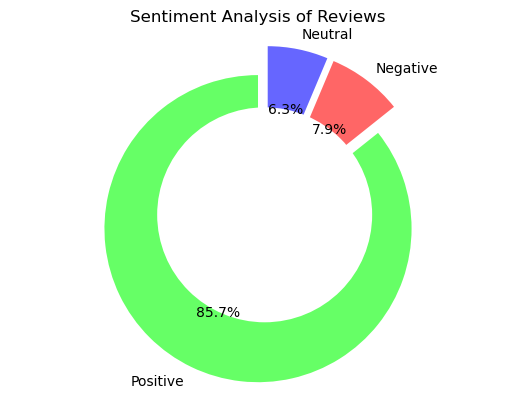

In [69]:
#Calculate the sentiment analysis using the text blob default analyzer 
positive_percent, negative_percent, neutral_percent = calculate_sentiment_percentages(df)

# Plotting the donut chart for the default Textblob analysis
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive_percent, negative_percent, neutral_percent]
colors = ['#66ff66', '#ff6666', '#6666ff']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

plt.title('Sentiment Analysis of Reviews')
plt.show()

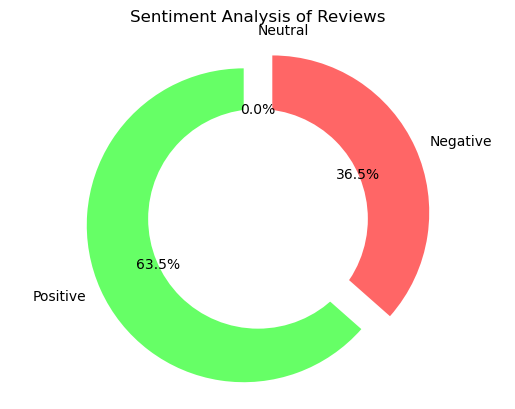

In [70]:
#Calculate the sentiment analysis using the NaiveBayesAnalyzer 
positive_percent, negative_percent, neutral_percent = calculate_sentiment_percentages(df, use_naive_bayes=True)

# Plotting the donut chart for the NaiveBayesAnalyzer analysis
labels = 'Positive', 'Negative', 'Neutral'
sizes = [positive_percent, negative_percent, neutral_percent]
colors = ['#66ff66', '#ff6666', '#6666ff']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of the pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

plt.title('Sentiment Analysis of Reviews')
plt.show()

Deletes the stop words from the reviews using the NLTK library stop-words lists.  
Displasy a WordCloud of the top 20 words used in the review..

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Justin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


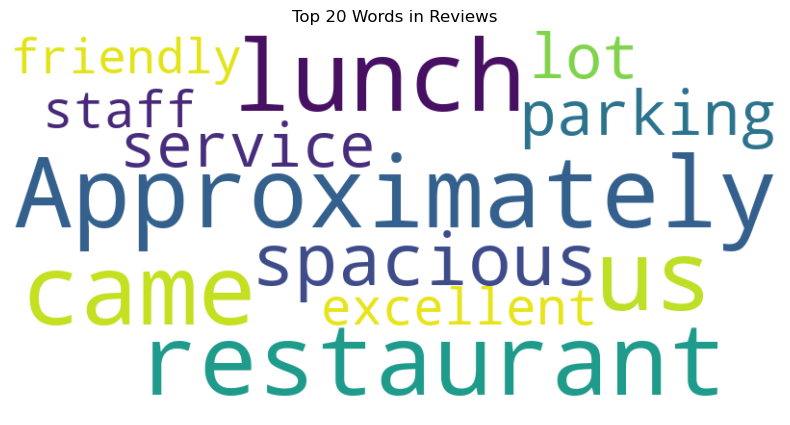

In [71]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

# Get the stop words
stop_words = set(stopwords.words('english'))

for index, row in df.iterrows():
    for review in row['Reviews']['reviews']:
        review_text = review['text']
        words = review_text.split()
        review_text = ' '.join([word for word in words if word.lower() not in stop_words])

#Calulate the wordcloud.
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=20).generate(review_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 20 Words in Reviews')
plt.axis('off')
plt.show()

Conclusion:

Overall the overall sentiment for each analysis was positive, but there was a large discrepency between the textblob default and the NaiveBayesAnalyzer Analysis.  The discrepancy in sentiment analysis results can be attributed to differences in their underlying algorithms and training data.

Default TextBlob Sentiment Analyshod utilizes a pattern-based approach to sentiment analysis. It assigns polarity scores to words based on a pre-defindictionarycon of words with known sentiment valueTe, the output shows a high percentage of positive sentiment (85.7%), indicating that the majority of the text is perceived as positive. This might be due to the presence of many words with positive polarity in the analyzed t  This can be further validated by the analysis of the wordcloud.  
eThe sis:
Naive Bayes classifieristic machine learning algorithm commonly used for text classification tasks, including sentiment analysis. It calculates the probability of a given text belonging to a particular sentiment class (positive, negative, or neutral) based on the occurrence of  Tcase, the output indicates a lower percentage of positive sentiment (63.5%) and a higher percentage of negative sentiment (36.5%) compared to TextBlob's default analysis. This suggests that the NaiveBayesAnalyzer algorithm detected more negative sentiment in the text, possibly due to different word weighting or contextual an
alysis.
Overall, the difference in results can be attributed to the inherent variability and subjectivity in sentiment analysis algorithms, as well as the different approaches and datasets used for training each algnalyzed.